In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics 

In [4]:
gold_data = pd.read_csv('/kaggle/input/goldpricedata/gld_price_data.csv')

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#to print the last 5 rows of the dataset 
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
#number of rows and columns in the dataframe
gold_data.shape

(2290, 6)

In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
#checking the null values or missing values 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
#describe the data 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
* Positive correlation
* Negative correlation 

In [15]:
correlation = gold_data.corr(numeric_only=True)

In [ ]:
#constructing a heapmap to understand the correlation 

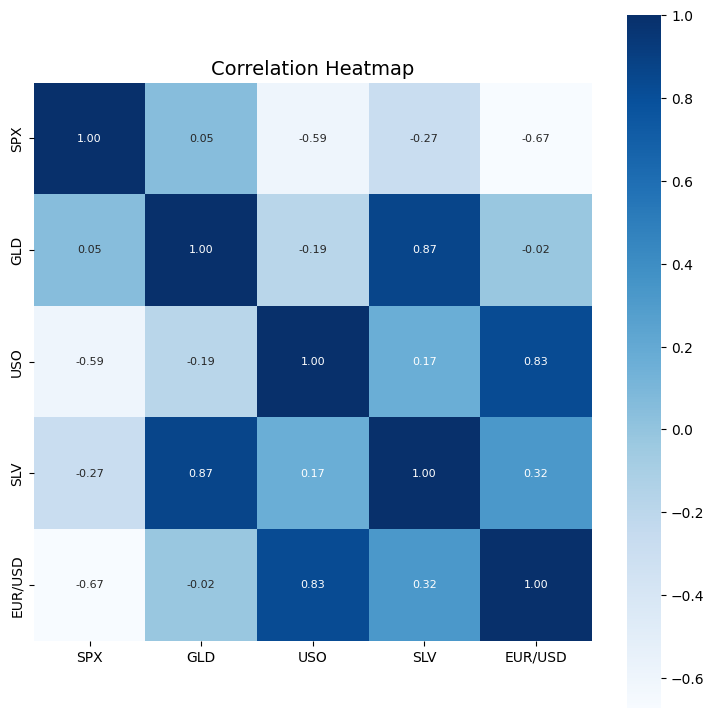

In [18]:
plt.figure(figsize=(9, 9))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.2f',
    annot=True,
    annot_kws={'size': 8},
    cmap='Blues'
)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

In [19]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Count'>

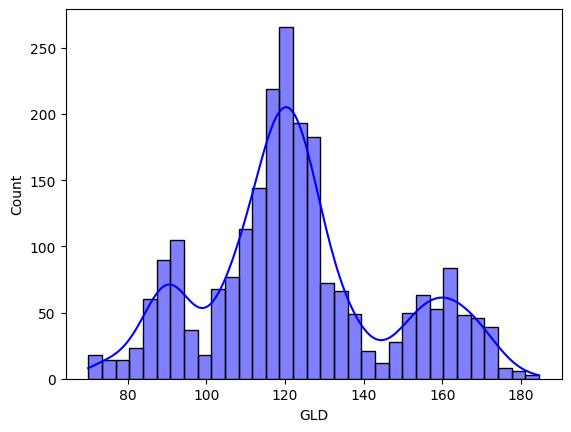

In [22]:
#checking the distribution of GLD Price 
sns.histplot(gold_data['GLD'], color='blue', kde=True)

In [24]:
#Splitting the features and Target 
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [26]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42)

Model Training: Random Forest Regressor

In [32]:
regressor = RandomForestRegressor(n_estimators= 100)

In [33]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [36]:
#prediction on test data 
test_data_prediciton = regressor.predict(X_test)

In [37]:
print(test_data_prediciton)

[122.50829935 130.32250315 127.48269972  96.61849744 118.97850065
 114.47079931 124.81770139 117.60419903 108.03360133  98.08669984
  95.41069986 167.20129858 148.56140105 116.0343009  170.7221012
  84.91159974 123.18799871 109.35899726 113.1990008  131.71430307
 124.13319897 113.62080058 115.54010094 108.80029978 108.40580094
 125.72849928 118.62809991 112.1752993  113.40690095 126.07989883
 146.09610155  89.41039954 167.63659957 113.8156991  108.40890119
 120.17900105 141.76809833 161.25750134 173.97879784 153.1271015
 119.54910135 113.00100064 121.32279973 113.58029871 122.13140008
 107.94000112  88.57899888 114.51479912 129.69330246 117.75080109
 103.34420003 129.77150297 107.07709875 160.51750391 131.74530005
 118.26619952 147.22890038 135.79700257  95.70100094 124.75460158
 115.10149847  86.16000047 104.25149926 113.89300062  84.1571996
 122.30830004 116.30359875 113.52370209 165.28860256  92.1125002
  79.96500091 161.1003008  158.94140193 107.30459993 149.26460103
 109.65979779 

In [39]:
#R squared error 
error_score = metrics.r2_score(Y_test, test_data_prediciton)
print("R squared error: ", error_score)

R squared error:  0.9895239765063792


Compare the Actual Values and the predicted Values in the Plot

In [40]:
Y_test = list(Y_test)

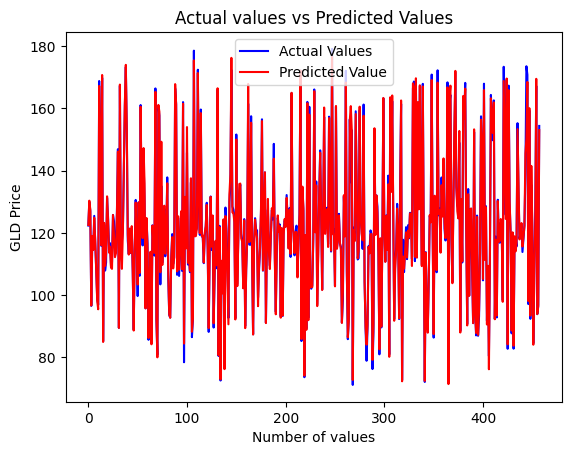

In [46]:
plt.plot(Y_test, color='blue', label="Actual Values")
plt.plot(test_data_prediciton, color='red', label="Predicted Value")
plt.title("Actual values vs Predicted Values")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()